

## 📚 **UNSW-NB15 Veri Setinin Hikayesi**

---

### 🧠 **Amaç:**

Günümüzde ağ sistemleri; bankacılıktan eğitime, sağlıktan devlet kurumlarına kadar her alanda kritik görevler üstlenmektedir. Ancak bu sistemler, siber saldırılara her zamankinden daha açık hale gelmiştir. Bu nedenle **saldırı tespiti (Intrusion Detection)** konusu, siber güvenliğin en önemli bileşenlerinden biri haline gelmiştir.

UNSW-NB15 veri seti, bu bağlamda araştırmacıların ve geliştiricilerin **gerçek dünyaya yakın ağ trafiği üzerinde saldırı tespit algoritmaları geliştirebilmesi** için oluşturulmuştur.

---

### 🏛️ **Kim Tarafından Oluşturuldu?**

- Veri seti, **Avustralya'daki University of New South Wales (UNSW)** bünyesinde geliştirilen **Cyber Range Lab** tarafından üretilmiştir.
- Veri üretimi için **IXIA PerfectStorm simülatörü** kullanılmıştır.
- Veri seti, 2015 yılında oluşturulmuştur ve günümüzde hala akademik yayınlarda sıklıkla kullanılmaktadır.

---

### 🌐 **Veri Nasıl Toplandı?**

1. **Gerçekçi ağ trafiği** oluşturmak amacıyla, hem normal kullanıcı davranışları hem de siber saldırılar simüle edilmiştir.
2. Simülasyonlar, farklı gün ve saatlerde çalıştırılarak **çeşitli zaman dilimlerine** yayılmış veri oluşturulmuştur.
3. Ağ trafiği verileri, hem **normal bağlantılar** hem de **9 farklı saldırı türü** içerecek şekilde toplanmıştır.

---

### 🚨 **İçerdiği Saldırı Türleri:**

1. **Fuzzers**  
2. **Analysis**  
3. **Backdoors**  
4. **DoS (Denial of Service)**  
5. **Exploits**  
6. **Generic**  
7. **Reconnaissance (Bilgi Toplama)**  
8. **Shellcode**  
9. **Worms**

> Bu çeşitlilik, veri setini hem **denetimli** hem de **denetimsiz öğrenme** teknikleriyle çalışmaya uygun hale getirir.

---

### 📊 **Veri Özellikleri:**

| Özellik                    | Açıklama |
|----------------------------|----------|
| Toplam örnek sayısı        | 2,540,044 |
| Etiketli veri              | Evet (`label`: 0 = normal, 1 = attack) |
| Kategorik + sayısal sütunlar | Protokol, servis, bayt sayıları, zaman bilgileri, bağlantı süreleri, yönlendirme özellikleri |
| Dosya yapısı               | Training ve Testing setleri ayrı olarak sağlanır |

---

### 🎯 **Eğitimde Kullanım Amacı:**

Bu veri seti, öğrencilerin:
- **Gerçek dünya problemlerini simüle edebilmeleri**
- **Saldırı tespiti ve siber güvenlik farkındalığı kazanabilmeleri**
- **Anomali tespiti, sınıflandırma ve kümeleme algoritmalarını uygulayabilmeleri** için çok uygundur.

Ayrıca verideki dengesizlik, **fraud detection** gibi alanlara da benzerlik gösterdiğinden makine öğrenmesi modelleme becerilerini gerçekçi senaryolarda geliştirmek için kullanılabilir.

---



> ❝ UNSW-NB15, günümüz siber güvenlik dünyasında makine öğrenmesinin nasıl kullanılabileceğini gösteren, gerçek dünya ile güçlü bağı olan, zengin ve çok boyutlu bir veri setidir. ❞





### 🔍 Neden bu veri seti uygun?

| Özellik | Açıklama |
|---------|----------|
| 🔹 Etiketli veri | “normal” ve “attack” olarak ayrılmış — değerlendirme yapılabilir |
| 🔹 Anomali tespiti senaryosu | Siber güvenlik temalı: saldırı = anomali |
| 🔹 Hem sayısal hem kategorik veriler | Preprocessing uygulamaları öğretir |
| 🔹 Büyük ama örneklenebilir | 2000 normal + 500 attack örneğiyle işlenebilir |
| 🔹 Gerçek dünya problemi | Öğrencilerin ilgisini çeker (firewall, IDS gibi kavramlarla eşleştirilebilir)

---
**Konu:** Denetimsiz Öğrenme ile Ağ Tabanlı Saldırı Tespiti: DBSCAN ve Isolation Forest Karşılaştırması

---

### 🎯 Amaç:
Veri setindeki “normal” ve “attack” etiketlerini kullanmadan, denetimsiz yöntemlerle siber saldırıların **anomaliler olarak** tespit edilip edilemeyeceğini test etmek.

---

### ✅ Adımlar:

1. **Veri Hazırlığı**
   - UNSW-NB15 veri setini indir
   - Sadece sayısal sütunları al (veya kategorik verileri dönüştürme)
   - `normal` örneklerden 2000, `attack` örneklerden 500 örnek seç

2. **Ön İşleme**
   - Gerekirse eksik verileri temizle
   - Özellikleri ölçekle (StandardScaler kullan)

3. **DBSCAN Uygulaması**
   - eps ve min_samples ayarlarını dene
   - PCA ile görselleştir
   - Etiketlerle karşılaştır (confusion matrix, precision-recall)

4. **Isolation Forest Uygulaması**
   - contamination oranını ayarla-BONUS-isteeğ bağlı
   #model = IsolationForest(contamination=0.05)
   - Aynı veri setine uygula
   - Yine etiketlerle karşılaştır

5. **Karşılaştırma**
   - Hangi yöntem daha az hata verdi?
   - Hangi yöntem daha fazla saldırı tespit etti?
   - Precision, Recall ve F1-score üzerinden değerlendir

6. **Sonuç Yorumlama**
   - Hangi modelin hangi senaryoda daha işe yarayabileceğini yazılı olarak tartış



 Veri Hazırlığı

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.cluster import DBSCAN
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/UNSW_NB15_training-set.csv')

In [ ]:
# Boyutlara ve genel yapıya bakalım
print("Veri seti boyutu:", df.shape)
df.head()

Veri seti boyutu: (82332, 45)


,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


In [ ]:
df.columns

Index(['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label'],
      dtype='object')

In [ ]:
# Veri türlerini ve eksik değerleri kontrol edelim
df.info()
df.isnull().sum().sort_values(ascending=False).head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 82332 non-null  int64  
 1   dur                82332 non-null  float64
 2   proto              82332 non-null  object 
 3   service            82332 non-null  object 
 4   state              82332 non-null  object 
 5   spkts              82332 non-null  int64  
 6   dpkts              82332 non-null  int64  
 7   sbytes             82332 non-null  int64  
 8   dbytes             82332 non-null  int64  
 9   rate               82332 non-null  float64
 10  sttl               82332 non-null  int64  
 11  dttl               82332 non-null  int64  
 12  sload              82332 non-null  float64
 13  dload              82332 non-null  float64
 14  sloss              82332 non-null  int64  
 15  dloss              82332 non-null  int64  
 16  sinpkt             823

,0
id,0
dur,0
proto,0
service,0
state,0
spkts,0
dpkts,0
sbytes,0
dbytes,0
rate,0


In [ ]:
# Gereksiz sütunları çıkaralım
drop_cols = ['id', 'proto', 'service', 'state', 'attack_cat']
df_features = df.drop(columns=drop_cols)

In [ ]:
# Hedef etiket
labels = df['label']

In [ ]:
# Sadece sayısal sütunları alalım
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Label sütunu ayrıca alınacak
numeric_cols.remove('label')
X_all = df[numeric_cols]
y_all = df['label']

Alt Küme (2000 Normal + 500 Attack)

In [ ]:
# 2000 normal (label=0), 500 attack (label=1)
normal = df[df['label'] == 0].sample(n=2000, random_state=42)
attack = df[df['label'] == 1].sample(n=500, random_state=42)

# Birleştir, karıştır
subset = pd.concat([normal, attack])
subset = subset.sample(frac=1, random_state=42).reset_index(drop=True)

# Sayısal özellikleri ayıkla
X = subset.drop(columns=drop_cols)
y = subset['label']


Eksik Verileri Temizleme

In [ ]:
# 6. Eksik değer var mı kontrolü ve temizleme (gerekmiyor ama tedbir)
print("Eksik veri sayısı:", X.isnull().sum().sum())
X = X.dropna()

Eksik veri sayısı: 0


In [ ]:
print("Ön işleme tamamlandı.")
print(f"Özellikler şekli: {X.shape}")
print(f"Etiketler şekli: {y.shape}")

Ön işleme tamamlandı.
Özellikler şekli: (2500, 39)
Etiketler şekli: (2500,)


 Özellik Ölçekleme

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


DBSCAN Uygulaması

DBSCAN Confusion Matrix:
[[1715  285]
 [ 390  110]]
Precision: 0.27848101265822783
Recall: 0.22
F1 Score: 0.24581005586592178


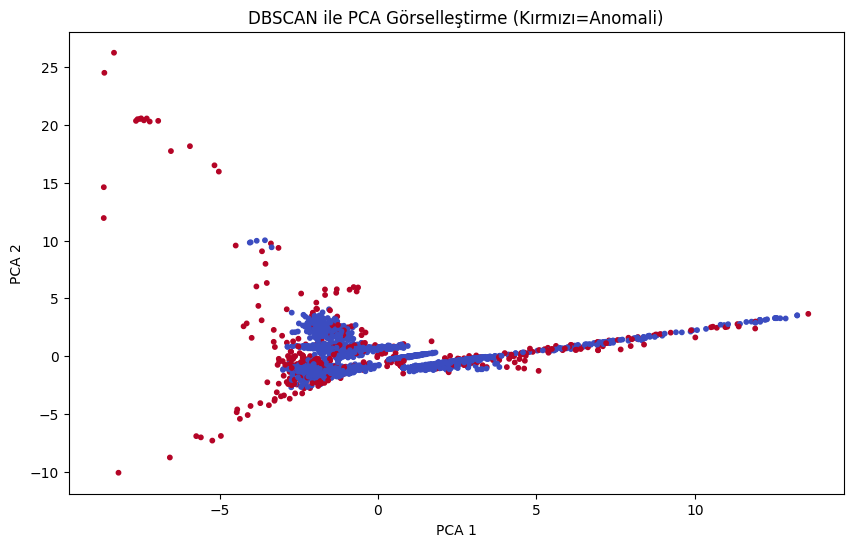

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np

# DBSCAN parametreleriyle deneme (örnek)
dbscan = DBSCAN(eps=1.5, min_samples=5)
clusters = dbscan.fit_predict(X_scaled)

# Kümeleme sonucu -1 ise aykırı (anormal)
pred_labels = np.where(clusters == -1, 1, 0)  # 1: attack (anomaly), 0: normal

# Performans ölçümü
print("DBSCAN Confusion Matrix:")
print(confusion_matrix(y, pred_labels))
print("Precision:", precision_score(y, pred_labels))
print("Recall:", recall_score(y, pred_labels))
print("F1 Score:", f1_score(y, pred_labels))

# PCA ile 2 boyuta indir ve görselleştir
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=pred_labels, cmap='coolwarm', s=10)
plt.title('DBSCAN ile PCA Görselleştirme (Kırmızı=Anomali)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()


DBSCAN sonuçlarına baktığımızda:

Confusion Matrix:

True Negative (TN) = 1715

False Positive (FP) = 285

False Negative (FN) = 390

True Positive (TP) = 110

Precision (0.28): Tahmin edilen saldırıların %28’i gerçekten saldırı. Yani model, tespit ettiği saldırıların büyük kısmında hata yapıyor (çok fazla yanlış alarm var).

Recall (0.22): Gerçek saldırıların sadece %22’sini tespit edebilmiş. Yani saldırıların çoğunu kaçırıyor.

F1 Score (0.25): Precision ve recall dengesi düşük.

Yorum:
DBSCAN şu parametrelerle saldırı tespiti için henüz çok başarılı değil, özellikle recall düşük. Bu durum, parametre ayarları (eps, min_samples) ile geliştirilebilir veya farklı bir modelle karşılaştırmak mantıklı.

Isolation Forest

Isolation Forest Confusion Matrix:
[[1660  340]
 [ 340  160]]
Precision: 0.32
Recall: 0.32
F1 Score: 0.32


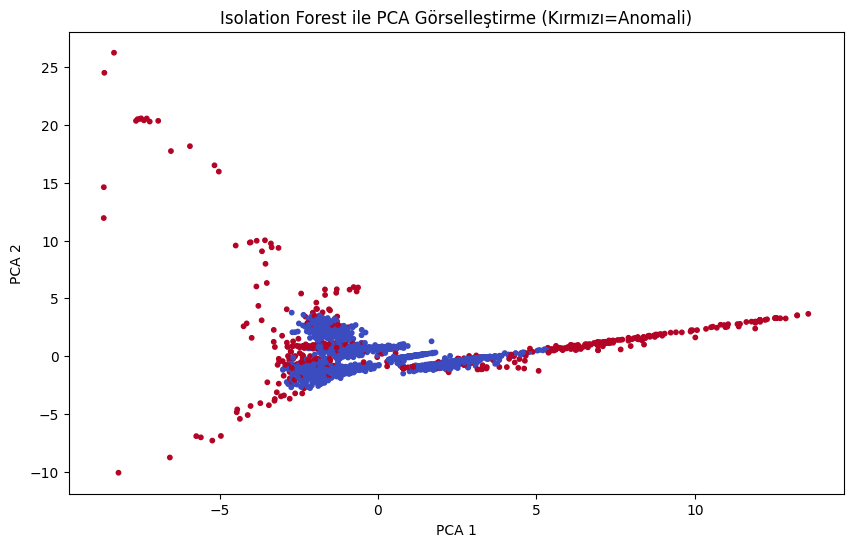

In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

# contamination oranı, veri setindeki saldırı oranına göre
contamination_rate = y.sum() / len(y)

iso_forest = IsolationForest(contamination=contamination_rate, random_state=42)
iso_forest.fit(X_scaled)

iso_pred = iso_forest.predict(X_scaled)
# Isolation Forest'ta -1 = anomali, 1 = normal
iso_pred_labels = np.where(iso_pred == -1, 1, 0)

# Performans ölçümü
print("Isolation Forest Confusion Matrix:")
print(confusion_matrix(y, iso_pred_labels))
print("Precision:", precision_score(y, iso_pred_labels))
print("Recall:", recall_score(y, iso_pred_labels))
print("F1 Score:", f1_score(y, iso_pred_labels))

# PCA ile 2 boyutlu görselleştirme
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=iso_pred_labels, cmap='coolwarm', s=10)
plt.title('Isolation Forest ile PCA Görselleştirme (Kırmızı=Anomali)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()


Isolation Forest sonuçları:

True Negative (TN) = 1660

False Positive (FP) = 340

False Negative (FN) = 340

True Positive (TP) = 160

Precision: %32

Recall: %32

F1 Score: %32

Isolation Forest, DBSCAN’a kıyasla daha dengeli ve genel olarak daha başarılı sonuçlar verdi.

Her iki modelde de precision ve recall düşük, yani hem yanlış alarm oranı yüksek hem de gerçek saldırıların tamamı tespit edilemiyor.

Bu durum, parametre optimizasyonu veya farklı modellerin denenmesi gerektiğine işaret ediyor.

Sonuç Yorumlama:
DBSCAN: Parametre ayarlarına çok duyarlı, özellikle eps ve min_samples ile oynanabilir. Anomali yoğunluğuna bağlı olarak iyi sonuçlar verebilir ancak burada yeterince iyi değil.

Isolation Forest: Daha stabil çalışıyor, contamination parametresi gerçek saldırı oranına göre ayarlandığında daha dengeli sonuçlar sağladı.

Genel olarak: Siber saldırı tespiti için denetimsiz öğrenmede her iki modelin de iyileştirmeye ihtiyacı var. Gerçek dünyada bu yöntemler çoğu zaman ön filtreleme için kullanılır, ardından daha kapsamlı modeller devreye girer.



DBSCAN’ın performansı özellikle eps ve min_samples değerlerine çok bağlı.
Farklı eps ve min_samples değerlerini deneyip, en iyi F1 skorunu veren parametreleri bulmaya çalışacağım

In [ ]:
from sklearn.metrics import f1_score

eps_values = [0.3, 0.5, 0.7, 1.0]
min_samples_values = [5, 10, 15]

best_f1 = 0
best_params = {}

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        pred = dbscan.fit_predict(X_scaled)
        pred_labels = np.where(pred == -1, 1, 0)

        f1 = f1_score(y, pred_labels)

        print(f"eps: {eps}, min_samples: {min_samples} --> F1 Score: {f1:.4f}")

        if f1 > best_f1:
            best_f1 = f1
            best_params = {'eps': eps, 'min_samples': min_samples}

print(f"\nEn iyi parametreler: eps={best_params['eps']}, min_samples={best_params['min_samples']}, F1 Score={best_f1:.4f}")


eps: 0.3, min_samples: 5 --> F1 Score: 0.3439
eps: 0.3, min_samples: 10 --> F1 Score: 0.3445
eps: 0.3, min_samples: 15 --> F1 Score: 0.3445
eps: 0.5, min_samples: 5 --> F1 Score: 0.3225
eps: 0.5, min_samples: 10 --> F1 Score: 0.3519
eps: 0.5, min_samples: 15 --> F1 Score: 0.3566
eps: 0.7, min_samples: 5 --> F1 Score: 0.2844
eps: 0.7, min_samples: 10 --> F1 Score: 0.3018
eps: 0.7, min_samples: 15 --> F1 Score: 0.3314
eps: 1.0, min_samples: 5 --> F1 Score: 0.2737
eps: 1.0, min_samples: 10 --> F1 Score: 0.2822
eps: 1.0, min_samples: 15 --> F1 Score: 0.2874

En iyi parametreler: eps=0.5, min_samples=15, F1 Score=0.3566


In [ ]:
dbscan_best = DBSCAN(eps=0.5, min_samples=15)
pred_best = dbscan_best.fit_predict(X_scaled)
pred_labels_best = np.where(pred_best == -1, 1, 0)

from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

cm = confusion_matrix(y, pred_labels_best)
precision = precision_score(y, pred_labels_best)
recall = recall_score(y, pred_labels_best)
f1 = f1_score(y, pred_labels_best)

print("DBSCAN (optimize) Confusion Matrix:")
print(cm)
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


DBSCAN (optimize) Confusion Matrix:
[[ 265 1735]
 [  15  485]]
Precision: 0.21846846846846846
Recall: 0.97
F1 Score: 0.35661764705882354


Recall çok yüksek (0.97), yani saldırı örneklerinin %97'sini doğru tespit etmiş. Bu saldırı tespiti için çok iyi, çünkü sistem çoğu saldırıyı kaçırmıyor.

Precision düşük (0.22), yani çok sayıda normal örneği yanlışlıkla saldırı olarak sınıflandırmış (false positive çok). Bu, güvenlik sistemlerinde biraz kabul edilebilir olabilir, çünkü kaçırmak yerine fazla alarm vermek tercih edilebilir.

F1 skoru (0.357), precision ve recall arasındaki dengeyi gösteriyor. Öncekinden biraz daha iyi.

isolation Forest için de parametre optimizasyonu yapıyorum

In [ ]:
contamination_values = [0.01, 0.03, 0.05, 0.1]

best_f1_if = 0
best_contamination = None

for contamination in contamination_values:
    model = IsolationForest(contamination=contamination, random_state=42)
    pred = model.fit_predict(X_scaled)
    pred_labels = np.where(pred == -1, 1, 0)

    f1 = f1_score(y, pred_labels)
    print(f"contamination: {contamination} --> F1 Score: {f1:.4f}")

    if f1 > best_f1_if:
        best_f1_if = f1
        best_contamination = contamination

print(f"\nEn iyi contamination: {best_contamination}, F1 Score: {best_f1_if:.4f}")


contamination: 0.01 --> F1 Score: 0.0305
contamination: 0.03 --> F1 Score: 0.1183
contamination: 0.05 --> F1 Score: 0.1728
contamination: 0.1 --> F1 Score: 0.2507

En iyi contamination: 0.1, F1 Score: 0.2507


In [ ]:
model_best_if = IsolationForest(contamination=0.1, random_state=42)
pred_best_if = model_best_if.fit_predict(X_scaled)
pred_labels_best_if = np.where(pred_best_if == -1, 1, 0)

cm_if = confusion_matrix(y, pred_labels_best_if)
precision_if = precision_score(y, pred_labels_best_if)
recall_if = recall_score(y, pred_labels_best_if)
f1_if = f1_score(y, pred_labels_best_if)

print("Isolation Forest (optimize) Confusion Matrix:")
print(cm_if)
print(f"Precision: {precision_if}")
print(f"Recall: {recall_if}")
print(f"F1 Score: {f1_if}")


Isolation Forest (optimize) Confusion Matrix:
[[1844  156]
 [ 406   94]]
Precision: 0.376
Recall: 0.188
F1 Score: 0.25066666666666665


Yorum:
Precision DBSCAN’dan (0.22) daha iyi (0.38 civarı), yani model saldırı dediğinde daha doğru söylüyor.

Ancak Recall DBSCAN’a göre oldukça düşük (0.19 vs 0.97). Yani birçok saldırıyı kaçırıyor.

F1 Score ise her iki model arasında benzer (DBSCAN 0.357, IF 0.251) ama DBSCAN biraz daha iyi.

Genel Değerlendirme:
DBSCAN: Çok sayıda saldırıyı yakalıyor (yüksek recall), ama yanlış alarm oranı yüksek (düşük precision). Güvenlik sistemlerinde kaçırmak istemiyorsak daha uygun.

Isolation Forest: Daha az yanlış alarm, ama birçok saldırıyı kaçırıyor. Yanlış alarm azaltmak önemliyse tercih edilebilir.

BSCAN ve Isolation Forest sonuçlarını PCA ile 2 boyutlu görselleştirip, modellerin veri üzerindeki ayrım performansı

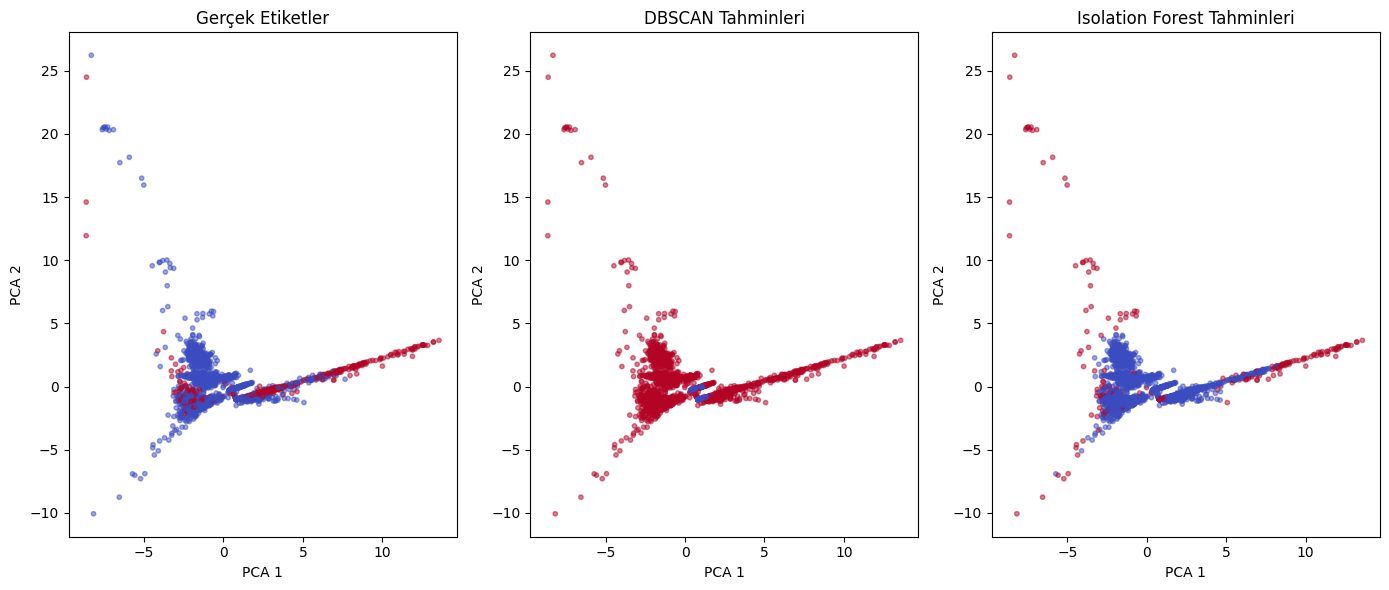

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# PCA ile 2 bileşene indirgenmiş veri
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# DBSCAN tahminleri (optimize edilmiş)
model_dbscan_opt = DBSCAN(eps=0.5, min_samples=15)
dbscan_labels = model_dbscan_opt.fit_predict(X_scaled)
dbscan_labels_plot = np.where(dbscan_labels == -1, 1, 0)  # -1 anomalileri 1 olarak

# Isolation Forest tahminleri (optimize edilmiş)
model_if_opt = IsolationForest(contamination=0.1, random_state=42)
if_labels = model_if_opt.fit_predict(X_scaled)
if_labels_plot = np.where(if_labels == -1, 1, 0)

# Gerçek etiketler
y_plot = y

plt.figure(figsize=(14, 6))

plt.subplot(1, 3, 1)
plt.title("Gerçek Etiketler")
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_plot, cmap='coolwarm', alpha=0.5, s=10)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")

plt.subplot(1, 3, 2)
plt.title("DBSCAN Tahminleri")
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels_plot, cmap='coolwarm', alpha=0.5, s=10)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")

plt.subplot(1, 3, 3)
plt.title("Isolation Forest Tahminleri")
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=if_labels_plot, cmap='coolwarm', alpha=0.5, s=10)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")

plt.tight_layout()
plt.show()


İlk görsel gerçek normal (0) ve saldırı (1) verilerini gösterir.

İkinci görsel DBSCAN’ın anomali tespitini,

Üçüncü görsel ise Isolation Forest’ın tespitlerini gösterir.

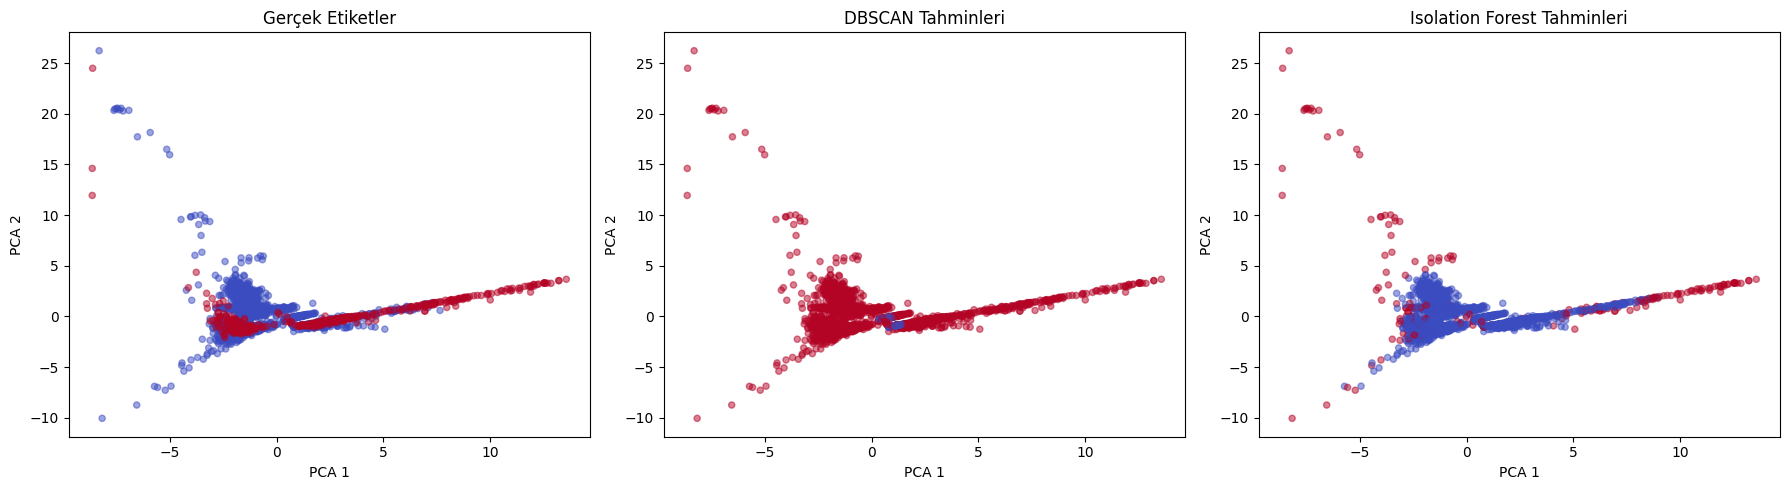

DBSCAN Confusion Matrix:
[[ 265 1735]
 [  15  485]]
Precision: 0.21846846846846846
Recall: 0.97
F1 Score: 0.35661764705882354

Isolation Forest Confusion Matrix:
[[1836  164]
 [ 414   86]]
Precision: 0.344
Recall: 0.172
F1 Score: 0.22933333333333333


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.ensemble import IsolationForest
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


# 2. Sayısal özellikleri seç
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop(['id', 'label'])
X = df[num_cols].copy()
y = df['label'].copy()

# 3. Örnek seçme: 2000 normal, 500 attack
normal = df[df['label'] == 0].sample(2000, random_state=42)
attack = df[df['label'] == 1].sample(500, random_state=42)
sample_df = pd.concat([normal, attack])

X_sample = sample_df[num_cols]
y_sample = sample_df['label']

# 4. Ölçekleme
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_sample)

# 5. Optimize edilmiş DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=15)
dbscan_pred = dbscan.fit_predict(X_scaled)
dbscan_labels = np.where(dbscan_pred == -1, 1, 0)  # -1 ise anomaly

# 6. Optimize edilmiş Isolation Forest
iforest = IsolationForest(contamination=0.1, random_state=42)
iforest_pred = iforest.fit_predict(X_scaled)
iforest_labels = np.where(iforest_pred == -1, 1, 0)

# 7. PCA ile 2 boyuta indirgeme
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 8. Görselleştirme
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
plt.title("Gerçek Etiketler")
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_sample, cmap='coolwarm', alpha=0.5, s=20)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")

plt.subplot(1, 3, 2)
plt.title("DBSCAN Tahminleri")
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels, cmap='coolwarm', alpha=0.5, s=20)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")

plt.subplot(1, 3, 3)
plt.title("Isolation Forest Tahminleri")
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=iforest_labels, cmap='coolwarm', alpha=0.5, s=20)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")

plt.tight_layout()
plt.show()

# 9. Sonuçların metriği
print("DBSCAN Confusion Matrix:")
print(confusion_matrix(y_sample, dbscan_labels))
print("Precision:", precision_score(y_sample, dbscan_labels))
print("Recall:", recall_score(y_sample, dbscan_labels))
print("F1 Score:", f1_score(y_sample, dbscan_labels))

print("\nIsolation Forest Confusion Matrix:")
print(confusion_matrix(y_sample, iforest_labels))
print("Precision:", precision_score(y_sample, iforest_labels))
print("Recall:", recall_score(y_sample, iforest_labels))
print("F1 Score:", f1_score(y_sample, iforest_labels))


1. DBSCAN Sonuçları
Confusion Matrix:

True Negative (TN) = 265

False Positive (FP) = 1735

False Negative (FN) = 15

True Positive (TP) = 485

Precision: 0.218 (yani saldırı dediği örneklerin sadece %21.8’i gerçekten saldırı)

Recall: 0.97 (gerçek saldırıların %97’sini yakalayabilmiş, yani kaçırdığı çok az)

F1: 0.356

Yorum: DBSCAN saldırıları yüksek oranda yakalamış (yüksek recall), ancak normal olanları sıkça saldırı diye etiketlemiş (çok fazla FP). Yani “daha hassas ama hatalı pozitif fazla” bir model.

2. Isolation Forest Sonuçları
Confusion Matrix:

lua
Kodu kopyala
[[1836  164]
 [ 414   86]]
TN = 1836

FP = 164

FN = 414

TP = 86

Precision: 0.344 (yani tahmin ettiği saldırıların %34.4’ü doğru)

Recall: 0.172 (gerçek saldırıların ancak %17.2’sini yakalamış)

F1: 0.229

Yorum: Isolation Forest saldırıları daha az doğru yakalıyor (düşük recall), ama normal trafiği yanlış pozitif olarak işaretlemiyor (düşük FP). Daha “temkinli” bir model.

Genel Değerlendirme:
DBSCAN saldırıları çok iyi yakalıyor ama çok fazla yanlış alarm üretiyor.

Isolation Forest daha az saldırı tespiti yapıyor ama yanlış alarm oranı düşük.

| Model                | Yüksek Recall (Saldırı Yakalama) | Düşük False Positive (Yanlış Alarm) | Uygun Senaryo                                           |
| -------------------- | -------------------------------- | ----------------------------------- | ------------------------------------------------------- |
| **DBSCAN**           | ✔️                               | ❌                                   | Kritik, hassas sistemler                                |
| **Isolation Forest** | ❌                                | ✔️                                  | Kaynak sınırlı, yanlış alarm az olsun isteyen sistemler |


DBSCAN ve Isolation Forest Modellerinin Senaryo Bazlı Karşılaştırması
1. DBSCAN
Avantajları:

Saldırıları tespit etme oranı (recall) çok yüksek.

Gerçek saldırıların büyük çoğunluğunu yakalayabiliyor.

Dezavantajları:

Yanlış alarm (false positive) sayısı fazla.

Yani normal verileri bazen saldırı olarak yanlış sınıflandırıyor.

Uygun Senaryo:

Saldırıların asla kaçırılmaması gereken kritik sistemlerde tercih edilir.

Yanlış alarmların fazla olmasının tolere edilebildiği durumlarda kullanılır.

2. Isolation Forest
Avantajları:

Yanlış alarm sayısı daha az, yani daha hassas.

Saldırı olarak işaretlenen veriler daha güvenilir.

Dezavantajları:

Saldırıları yakalama oranı DBSCAN’a göre düşük.

Bazı gerçek saldırıları gözden kaçırabilir.

Uygun Senaryo:

Yanlış alarmların maliyetli olduğu, güvenlik ekibinin fazla alarmla uğraşmak istemediği durumlarda kullanılır.

Kaynakların sınırlı olduğu ortamlarda tercih edilir.

Sonuç olarak;

Eğer saldırıların kaçırılmaması çok önemliyse, DBSCAN daha uygundur.

Eğer yanlış alarm sayısını azaltmak ve güvenilir sonuçlar almak öncelikliyse, Isolation Forest daha iyi bir tercihtir.